In [9]:
import pandas as pd

In [12]:
pwd

'/Users/luna/Desktop'

In [14]:
data = pd.read_csv('/Users/luna/Desktop/lab_2/NationalNames.csv', index_col="Id")

/Users/luna/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [15]:
data.head()

,Name,Year,Gender,Count
Id,,,,
1,Mary,1880,F,7065
2,Anna,1880,F,2604
3,Emma,1880,F,2003
4,Elizabeth,1880,F,1939
5,Minnie,1880,F,1746


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1825433 entries, 1 to 1825433
Data columns (total 4 columns):
Name      object
Year      int64
Gender    object
Count     int64
dtypes: int64(2), object(2)
memory usage: 69.6+ MB


In [17]:
data.shape #(raws, columns)

(1825433, 4)

In [21]:
data[['Name', 'Count']] #How to call certain columns 

,Name,Count
Id,,
1,Mary,7065
2,Anna,2604
3,Emma,2003
4,Elizabeth,1939
5,Minnie,1746
...,...,...
1825429,Zykeem,5
1825430,Zymeer,5
1825431,Zymiere,5


In [22]:
row_list = [1,15,100,100]
col_list = ['Name', 'Gender']

In [23]:
data.loc[row_list, col_list] # By using loc to find the location for specified rows and columns.

,Name,Gender
Id,,
1,Mary,F
15,Cora,F
100,Emily,F
100,Emily,F


In [24]:
data.loc[row_list,] #Not specifying cols, pandas lib will get all the cols in the csv file.

,Name,Year,Gender,Count
Id,,,,
1,Mary,1880,F,7065
15,Cora,1880,F,1045
100,Emily,1880,F,210
100,Emily,1880,F,210


In [25]:
mask = data['Count'] > 90000

In [27]:
mask.value_counts()

False    1825425
True           8
Name: Count, dtype: int64

In [30]:
data.loc[mask,]

,Name,Year,Gender,Count
Id,,,,
431053,Linda,1947,F,99680
437158,James,1947,M,94755
437159,Robert,1947,M,91642
441425,Linda,1948,F,96205
451660,Linda,1949,F,91010
533140,Michael,1956,M,90633
544603,Michael,1957,M,92709
556177,Michael,1958,M,90519


In [32]:
mask = (data['Count'] > 90000) & (data['Gender'] == 'F')

In [33]:
data.loc[mask,:]

,Name,Year,Gender,Count
Id,,,,
431053,Linda,1947,F,99680
441425,Linda,1948,F,96205
451660,Linda,1949,F,91010


In [34]:
data['Count'].mean()

184.68792116719703

In [36]:
data['Count'][data['Gender'] == 'M'].mean() #Get the counts for Males only and calulate the mean.

228.6587549579832

In [38]:
data.loc[data['Gender']== 'M', 'Count'].mean() #2nd way

228.6587549579832

In [39]:
# Get the percentage 
count_col = data['Count'] # First assign the needed data to a variable

In [40]:
count_sum = data['Count'].sum() # Second, get the summation of the numbers in the sepcified data. 

In [41]:
data['CountPercent'] = (count_col / count_sum) * 100

In [42]:
data.head()

,Name,Year,Gender,Count,CountPercent
Id,,,,,
1,Mary,1880,F,7065,0.002096
2,Anna,1880,F,2604,0.000772
3,Emma,1880,F,2003,0.000594
4,Elizabeth,1880,F,1939,0.000575
5,Minnie,1880,F,1746,0.000518


In [43]:
# Sorting data
data.sort_values(by='Count', ascending= True) # Change ascending into false to reverse the sorting.

,Name,Year,Gender,Count,CountPercent
Id,,,,,
1825433,Zyrin,2014,M,5,0.000001
1001394,Kentrail,1986,M,5,0.000001
1001395,Kentrel,1986,M,5,0.000001
1001396,Kenyada,1986,M,5,0.000001
1001397,Kenzo,1986,M,5,0.000001
...,...,...,...,...,...
437159,Robert,1947,M,91642,0.027183
544603,Michael,1957,M,92709,0.027499
437158,James,1947,M,94755,0.028106


In [45]:
# The basics for collecting the data
data['Count'][(data['Year'] == 1880) & (data['Gender'] == 'F')].mean()

96.59554140127389

In [46]:
data['Count'][(data['Year'] == 1880) & (data['Gender'] == 'M')].mean()

104.43383742911153

In [47]:
# Group By
data_agg = data.groupby(['Year','Gender'])

In [49]:
data_agg['Count'].mean()

Year  Gender
1880  F          96.595541
      M         104.433837
1881  F          98.031983
      M         101.048144
1882  F         104.912451
                   ...    
2012  M         132.907569
2013  F          90.945704
      M         134.275121
2014  F          92.766298
      M         136.036059
Name: Count, Length: 270, dtype: float64

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
data_summary = data.groupby('Year')['Count'].mean()

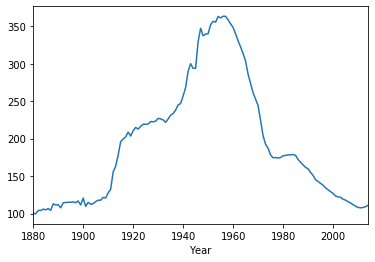

In [53]:
data_summary.plot()

In [ ]:
# select certain rows
data[data.Name == 'Mohammed']